---

# SPACESHIP TITANIC DISASTER

---


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

In [24]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


---
# Data Cleaning and Preprocessing

---
Checking which data attributes are Categorical or Numerical?

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


--- 
Checking for Null Values and modifying them.

In [26]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Removing Records with multiple N/A values

In [27]:
def remove_multiple_na(database: pd.DataFrame):
    values_to_be_removed = []
    for col1 in database.columns:
        for col2 in database.columns:
            if col1 != col2:
                for col3 in database.columns:
                    if col2 != col3:
                        index = database[(database[col1].isnull()) & (database[col2].isnull()) & (database[col3].isnull())].index
                        for i in index:
                            values_to_be_removed.append(i)
    
    database = database.drop(values_to_be_removed)
    return database

In [28]:
df = remove_multiple_na(df)
df.isnull().sum()

PassengerId       0
HomePlanet      163
CryoSleep       167
Cabin           158
Destination     146
Age             151
VIP             165
RoomService     149
FoodCourt       142
ShoppingMall    164
Spa             153
VRDeck          151
Name            158
Transported       0
dtype: int64

Filling the N/A values

In [29]:
def filling(col, data):
    if data[col].dtype == float:
        data[col] = data[col].fillna(value=data[col].median())
    elif data[col].dtype == object:
        data[col] = data[col].fillna(value=str(data[col].value_counts().index[0]))

for column in df.columns:
    filling(column, df)

In [30]:
cabin_split = df['Cabin'].str.split("/", expand=True)
cabin_split.columns = ['Deck', 'RoomNumber', 'Side']
df = df.join(cabin_split)
del cabin_split

In [31]:
df = df.join(pd.get_dummies(df[['Side', 'HomePlanet', 'Deck', 'Destination']], dtype=int))
df['VIP'] = df['VIP'].astype(bool).astype(int)
df['RoomNumber'] = df['RoomNumber'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(bool).astype(int)
df['Transported'] = df['Transported'].astype(bool).astype(int)

In [32]:
df.rename(columns={'Side_P': 'P', 'Side_S': 'S', 'HomePlanet_Earth': 'Earth', 'HomePlanet_Europa': 'Europa',
                         'HomePlanet_Mars': 'Mars','Deck_A': 'A','Deck_B': 'B', 'Deck_C': 'C', 'Deck_D': 'D', 'Deck_E': 'E',
                         'Deck_F': 'F', 'Deck_G': 'G', 'Deck_T': 'T', 'Destination_55 Cancri e': 'Canri', 'Destination_PSO J318.5-22': 'PSO',
                         'Destination_TRAPPIST-1e': 'Trappist'}, inplace=True)

df = df.drop(columns=['Side', 'HomePlanet', 'Cabin', 'Destination', 'Deck', 'Name'])

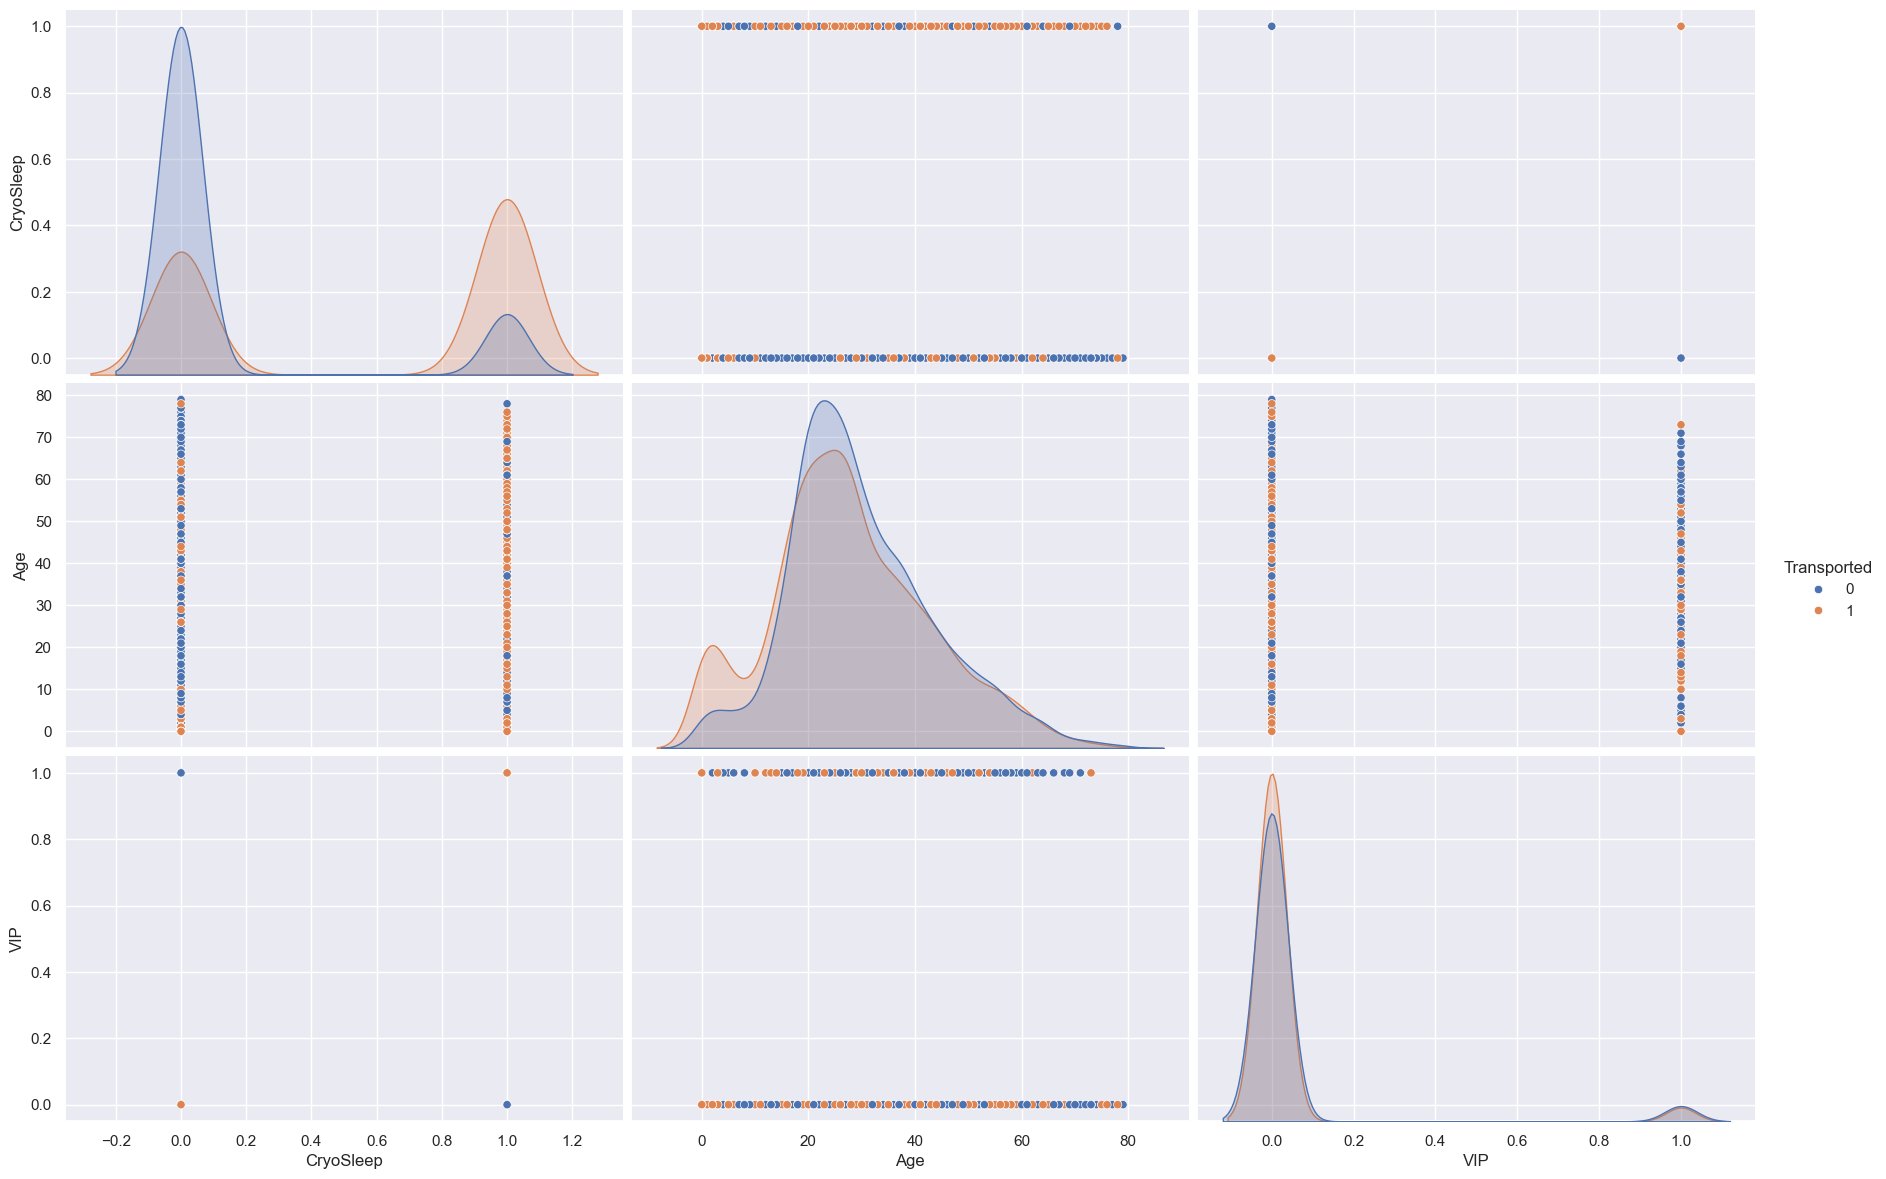

In [33]:
sns.set_theme(font_scale=1)
sns.pairplot(data=df, vars=['CryoSleep', 'Age', 'VIP'], hue='Transported', height=4, aspect=1.5)
plt.show()

In [34]:
def plot_heatmap(database, annot=True, cmap=None, annot_kws={}, fig_size=(50, 20), font_scaling=2):
    plt.figure(figsize=fig_size)
    sns.set_theme(font_scale=font_scaling)
    sns.heatmap(database,annot=annot, cmap=cmap,annot_kws=annot_kws)
    plt.show()


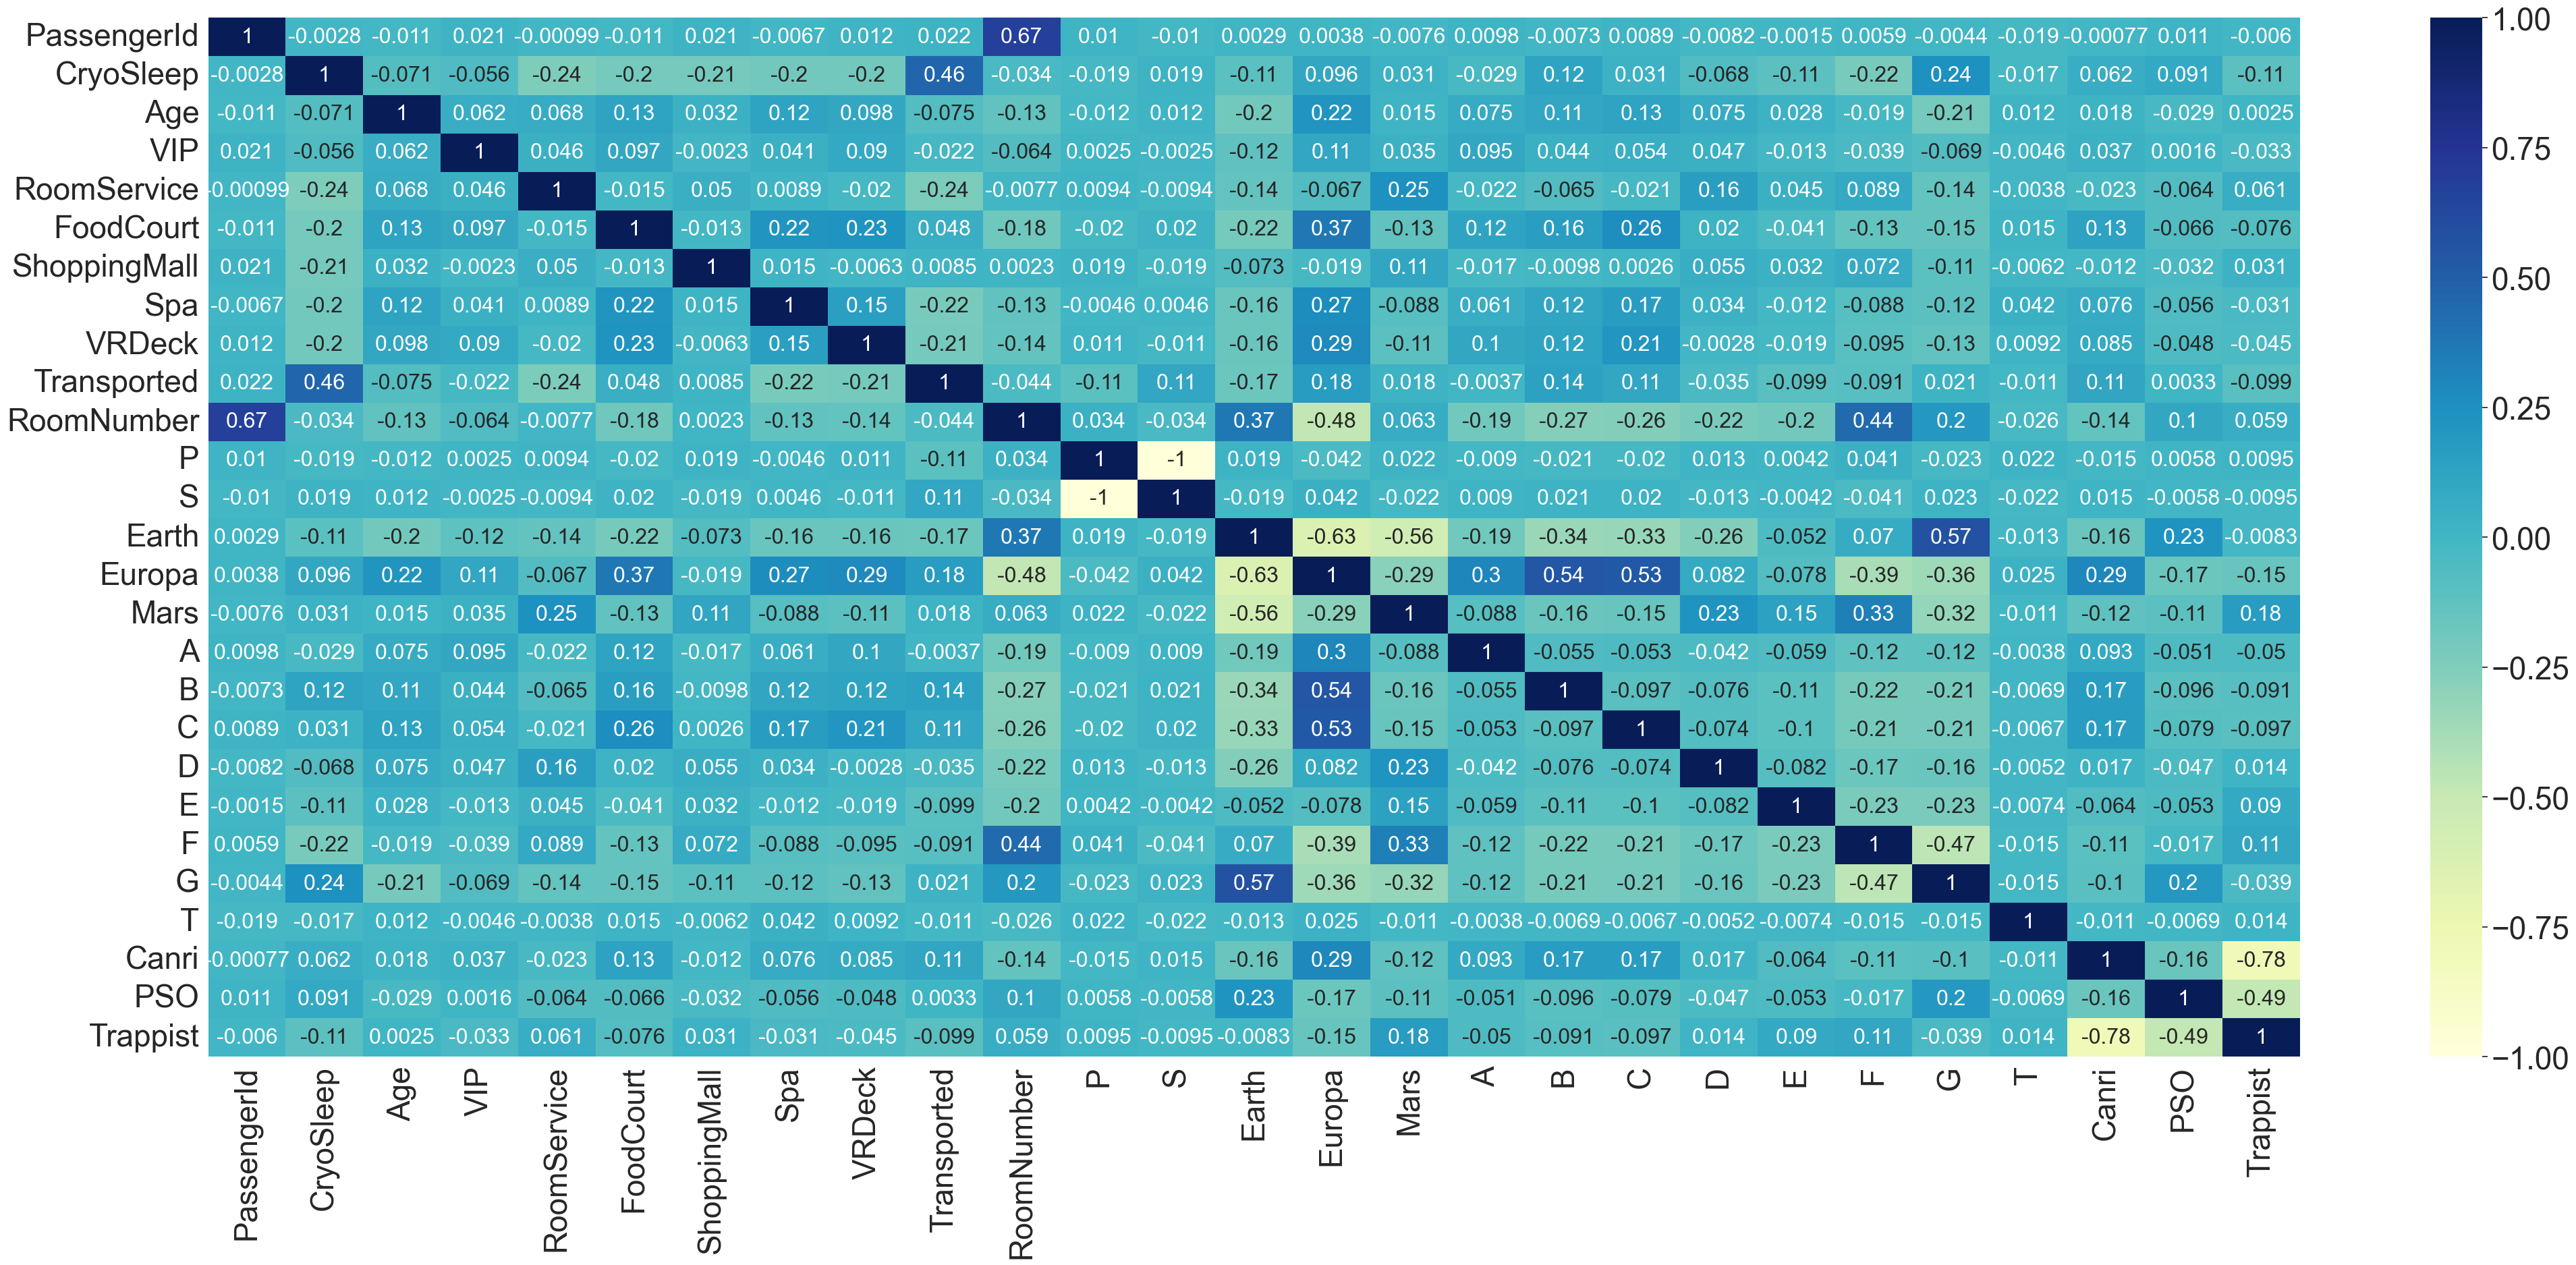

In [35]:
plot_heatmap(df.corr(), font_scaling=3, cmap='YlGnBu', annot_kws={"size": 23})

In [36]:
training_data = df.drop(columns=['PassengerId', 'PSO', 'Age', 'VIP', 'RoomNumber'])


---


# Training the Model: RandomForestClassifier

Splitting data into training and testing part


In [42]:
from sklearn.model_selection import train_test_split

X = training_data.drop(columns='Transported')
y = training_data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2, shuffle=True)

In [40]:
def grid_search(model, model_params, cv, n_jobs, X, y):
    from sklearn.model_selection import GridSearchCV
    clf = GridSearchCV(estimator=model, param_grid=model_params, cv=cv, n_jobs=n_jobs, verbose=True)
    print("Instantiating the Model Training")
    clf.fit(X, y)
    print('Best HyperParameter Settings:', clf.best_estimator_)
    return clf


In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=140, random_state=30, min_samples_split=14)
# forest = RandomForestClassifier(verbose=True)

# params = {
#     "n_estimators": [136, 137, 140],
#     "random_state": [37, 39],
#     "min_samples_split": [14, 15]
# }

# forest.fit(X, y)

# forest.fit(X_train, y_train)
# forest.score(X_test, y_test)

# search = grid_search(forest, params, cv=10, n_jobs=1, X=X, y=y)

0.8294985250737463

In [ ]:
test_df = pd.read_csv("test.csv")

for column in test_df.columns:
    filling(column, test_df)
    
cabin_split = test_df['Cabin'].str.split("/", expand=True)
cabin_split.columns = ['Deck', 'RoomNumber', 'Side']
test_df = test_df.join(cabin_split)
del cabin_split

test_df = test_df.join(pd.get_dummies(test_df[['Side', 'HomePlanet', 'Deck', 'Destination']], dtype=int))
test_df['VIP'] = test_df['VIP'].astype(bool).astype(int)
test_df['RoomNumber'] = test_df['RoomNumber'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(bool).astype(int)

test_df.rename(columns={'Side_P': 'P', 'Side_S': 'S', 'HomePlanet_Earth': 'Earth', 'HomePlanet_Europa': 'Europa',
                         'HomePlanet_Mars': 'Mars','Deck_A': 'A','Deck_B': 'B', 'Deck_C': 'C', 'Deck_D': 'D', 'Deck_E': 'E',
                         'Deck_F': 'F', 'Deck_G': 'G', 'Deck_T': 'T', 'Destination_55 Cancri e': 'Canri', 'Destination_PSO J318.5-22': 'PSO',
                         'Destination_TRAPPIST-1e': 'Trappist'}, inplace=True)

passengers = test_df['PassengerId']
test_df = test_df.drop(columns=['PassengerId', 'Side', 'HomePlanet', 'Cabin', 'Destination', 'Deck', 'Name', 'PSO', 'Age', 'VIP', 'RoomNumber'])

In [ ]:
result = forest.predict(test_df)

In [ ]:
output = pd.DataFrame({
    "PassengerId": passengers,
    "Transported": result
})
output['Transported'] = output['Transported'].astype(bool)
output.to_csv("submission.csv", index=None)

In [ ]:
len(output)

4277